In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

# Data Preparation

In [2]:
#Any dataset can be chosen from sources
#For simplicity purpose and for a perfect visualisation preparing a simple dataset
#As logistic regression working principle is 
#It creates a line or a hyperplane that seperates the points into different classes
#The classification is done based on the positive or negative distance from the plane
#Logistic Regression doesn't work with data having concentric circle plots

In [3]:
#Normal Distribution is chosen because of simplicity
#For normal distribution mean,covariance is required
#two distributions are chosen to completely differentiate the points from each other
#so we can easily find the line or hyperplane

mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

# Normal Distribution of 500 points with given mean and co-variance are taken
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

print(dist_01)

(500, 2)
(500, 2)
[[-1.62212110e+00  6.25091771e-01]
 [ 1.70088225e+00  1.80151103e-01]
 [ 7.85547413e-01  1.58723697e+00]
 [ 1.71544610e+00 -1.86979312e-01]
 [ 6.91495122e-01  1.88740374e+00]
 [ 2.45817829e+00  1.98653205e+00]
 [ 1.60339170e+00  2.77058193e+00]
 [ 6.88285070e-01  1.05421366e+00]
 [ 2.89092013e+00 -2.29520969e+00]
 [ 1.38477710e+00 -7.14193550e-01]
 [ 1.28400821e+00 -4.45131621e-01]
 [ 4.69526155e-01  1.11766450e-01]
 [ 1.75041195e+00  1.82315376e+00]
 [ 5.66755560e-01 -1.03658531e+00]
 [ 1.29914956e-01  2.07046251e+00]
 [ 1.17962571e+00  5.03196132e-01]
 [ 2.31669793e+00  7.06460425e-01]
 [ 4.72796085e-01 -2.72969722e-01]
 [ 6.15247436e-01 -7.85967705e-01]
 [-6.20279297e-02 -8.10594648e-02]
 [-1.05259940e-01 -1.25775081e-02]
 [-3.47162639e-02 -4.85905939e-02]
 [ 3.41398087e+00 -5.73358034e-01]
 [ 1.17145908e+00  9.79179517e-01]
 [ 9.61558581e-01  2.84191568e-01]
 [ 3.76080688e-01  2.23928514e+00]
 [ 1.29835715e+00  2.39564328e+00]
 [ 4.22657544e-01  3.60806862e+00]
 [

# Plotting the Data

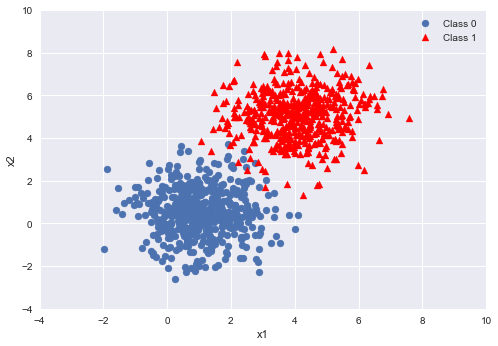

In [4]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')#class 0 is denoted with dot
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')#class 1 is denoted with '^'
plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Splitting Data in Training and Testing Data Set

In [5]:
#Optimal value for splitting the data is
#80%->Training
#20%->Testing

In [6]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [7]:
data[:500,:2] = dist_01 #the 1st 500 values in the data list contains the 1st normal distribution points
data[500:,:2] = dist_02 #the 2nd 500 values in the data list contains the 2nd normal distribution points
data[500:,-1] = 1.0 #initially all points belong to class 0, the 2nd distribution class is changed from class'0' to class'1'

In [8]:
np.random.shuffle(data)#shuffling the data to prevent the algorithm from being biased
print(data[:10])

[[ 5.82939199  6.30495786  1.        ]
 [ 1.34269195 -0.64161845  0.        ]
 [ 1.93661816  0.99056247  0.        ]
 [ 3.90110909  4.80425767  1.        ]
 [ 4.95164968  3.51717267  1.        ]
 [ 3.65300642  3.56954061  1.        ]
 [ 0.70488235  0.57958704  0.        ]
 [ 3.56074478  5.45488722  1.        ]
 [ 5.47540453  4.78737534  1.        ]
 [ 1.21979342  0.50687275  0.        ]]


In [9]:
split = int(0.8*data.shape[0])

In [10]:
#splitting the data into 80% training data and 20% testing data
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

print(X_train[:5])
print(Y_train[:5])

(800, 2) (200, 2)
(800,) (200,)
[[ 5.82939199  6.30495786]
 [ 1.34269195 -0.64161845]
 [ 1.93661816  0.99056247]
 [ 3.90110909  4.80425767]
 [ 4.95164968  3.51717267]]
[1. 0. 0. 1. 1.]


# Logistic Regression Algorithm

In [11]:
#we have to find a line or hyperplane which is best in classifying the given data
#the eqn of line is ax1+bx2+c=0
#the weight matrix w=[a b], the bias is b=c
def hypothesis(x,w,b):
    hx = np.dot(x,w)+b #the eqn ax1+bx2+c can be written as dot product of x,w and add b to it
    return sigmoid(hx)

In [12]:
#the sigmoid function is
#h(x)=1.0/(1.0+pow(e,-x))
def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [13]:
#the probability function p(y=1,x,theta) is h(x)
#the probability function p(y=0,x,theta) is (1-h(x))
#the probability that points lie far from the line equal to product of individual probabilities of the points
#the generalised probability fuction is p(y,x,theta)/L(theta) = pow(h(x),y)*pow((1-h(x)),(1-y))
#the log of above function is Log(l(theta)) y*log(h(x))+(1-y)*log(1-h(x))
#Log(L(theta)) function is also known as log likelihood function of theta
def error(y,x,w,b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/m

In [14]:
#J(theta)=(ax1+bx2+c-y)
def get_grad(x,w,b,y):
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_w += (y[i] - hx)*x[i] #the eqn is obtained by partially differentiating J(theta) w.r.t weight matrix(w)
        grad_b +=  (y[i]-hx) #the eqn is obtained by partially differentiating J(theta) w.r.t bias(b)
    
    grad_w /=m
    grad_b /=m
    return [grad_w,grad_b]

In [15]:
#here gradient ascent is used as log of probability function is concave function
#Log(L(theta))=y*log(h(x))+(1-y)*log(1-h(x))
#in order to calculate gradient descendent negative of log(L(theta)) is considered it means negative log likelihood function of theta
def gradient_ascent(x,y,w,b,learning_rate=0.01):
    err = error(y,x,w,b)
    [grad_w,grad_b] = get_grad(x,w,b,y)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err,w,b

In [16]:
#if the predicted value is less than 0.5 it belongs to class 0 else it belongs to class 1
def predict(x,w,b):   
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

In [17]:
#function to calculate the accuracy of the algorithm
def get_acc(x_tst,y_tst,w,b):
    y_pred = []
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)  
    y_pred = np.array(y_pred)
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [18]:
#generating random weight and bias matrices
loss = [] #loss list consists of error calculated for each point
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [19]:
for i in range(1000):
    l,W,b = gradient_ascent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)
print(l)

-0.1021995151833616


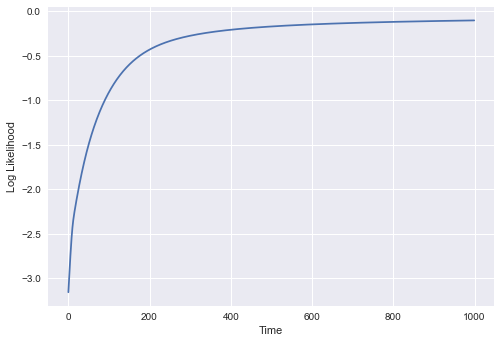

In [20]:
plt.plot(loss)
plt.ylabel("Log Likelihood")
plt.xlabel("Time")
plt.show()

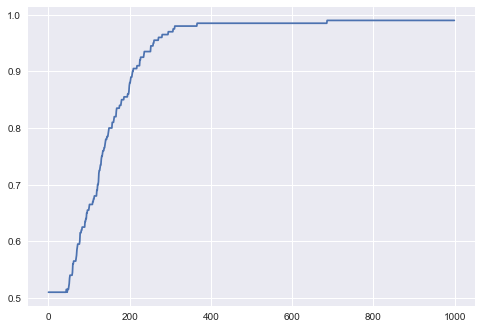

0.99


In [21]:
plt.plot(acc)
plt.show()
print(acc[-1]) #prints accuracy 

# Plotting a Hyperplane or a decision boundary

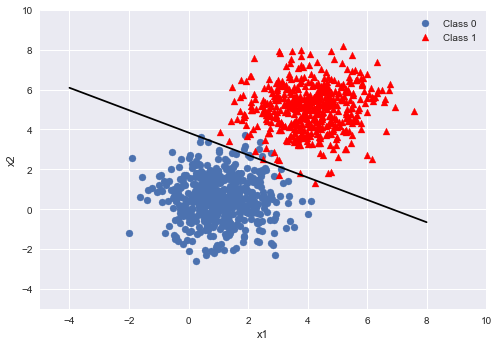

In [22]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [23]:
print(W)
print(b)

[0.6772788  1.20533442]
-4.6293414791948715
